<a id='top'></a>
# Challenge Set 3
Topic:        Linear Regression and Train/Test Split challenges  
Date:         07/25/2016  
Name:         Whitney Chia  
Worked with:  Alllll by myyyyyself 

[Question 1](#question1)   
[Question 2](#question2)   
[Question 3](#question3)   
[Question 4](#question4)   
[Question 5](#question5)   

<a id='question1'></a>
# Question 1   
[Top](#top)

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999

In [236]:
plt.style.use('ggplot')

In [237]:
df = pd.read_csv('2013_movies.csv')
df['ReleaseDate'] = pd.to_datetime(df.ReleaseDate)
df = df.sort_values(by = 'ReleaseDate')
df['gross_constant'] = 100000000
df['constant_difference'] = df['DomesticTotalGross'] - df['gross_constant']

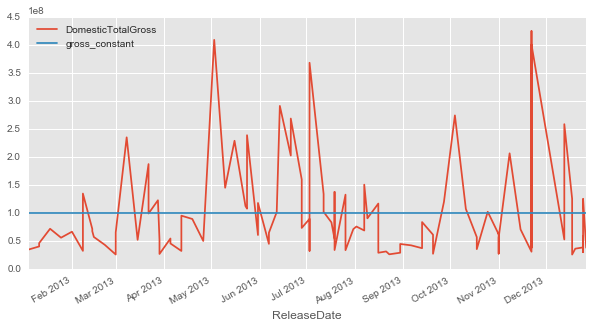

In [238]:
figsize = (10,5)
df.plot('ReleaseDate', ['DomesticTotalGross','gross_constant'], figsize = figsize)

I made a line of 100 million as my constant term. In the green you can see the green line as a predicted value over time. Though this model isn't horrible, it isn't much of a model. I say it isn't horrible because it appears that there are values lower and values higher, but it does not minimize the square errors of each observation. You would interpret this as, any movie you release, regardless of time of year, is predicted to gross 100 million dollars domestically. 

In [239]:
print len(df)
print len(df[df['constant_difference'] < 0])

100
65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c70c790>]], dtype=object)

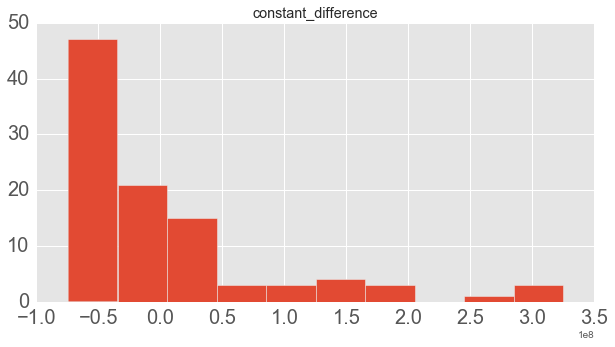

In [240]:
df.hist('constant_difference', xlabelsize=20, ylabelsize=20, figsize = figsize)

From the right skewed histogram, we can see that most movies will underperform the 100 million dollar constant that we are using as our predicted value. We can observe that out of the 100 movie list in our data set, 65 of them will either perform at or worse than our 100 million dollar constant value. This proves that the 100 million dollar predictor line was a bad model of domestic total gross.

<a id='question2'></a>
# Question 2
[Top](#top)

In [241]:
import random
df['random_continuous'] = random.sample(xrange(424668047), len(df))

In [242]:
df['continuous_difference'] = df['DomesticTotalGross'] - df['random_continuous']

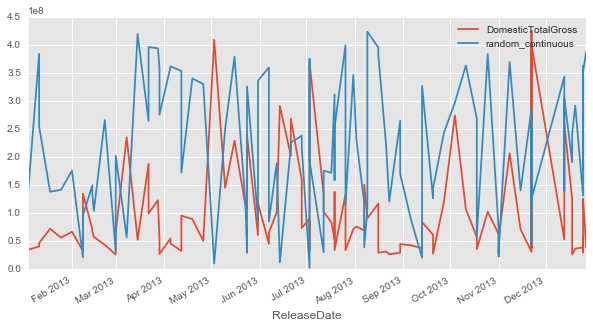

In [243]:
df.plot('ReleaseDate', ['DomesticTotalGross','random_continuous'], figsize = figsize)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdc95d0>]], dtype=object)

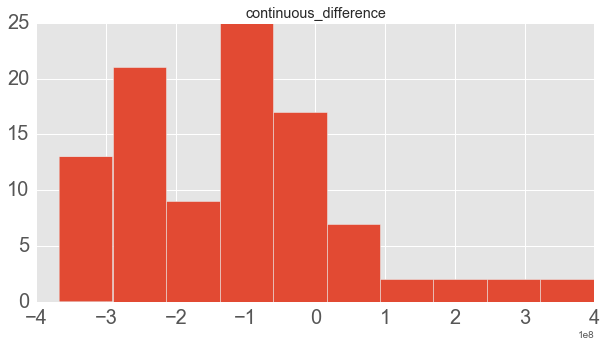

In [244]:
df.hist('continuous_difference', xlabelsize=20, ylabelsize=20, figsize = figsize)

I guess the results of this really depend on how you are making your continuous variable. I just did a random sample in the xrange(0,424668047).    
The 425 million number was about the high end of the range for the data set. So taking this I'm just doing a randomization number without replacement that tries to predict the Gross Domestic Total. This is a horrible model for a number of reasons.    

1) This will overestimate a lot of the grosses since we only have a handful in the high range in the data set, but this will treat the high numbers just as likely as the low numbers which isn't reality. A movie's Domestic Total Gross will more likely be on the low end than the high end.   

2) This is confirmed by our histogram of residuals, there are a lot more less than 0 than there are above zero. We can interpret this as the continuous line overestimates the gross domestic totals of movies very consistently.   

3) The lines do not match at all since we are not using any features that would affect the gross, we're just guessing without any sort of probability.   

<a id='question3'></a>
# Question 3
[Top](#top)

I don't quite understand what this question is asking, I think it's asking us to add a random categorical feature. Not sure if this is supposed to be a new random feature or a feature based on what we have already. I'm going to do both.   
I'm just creating a new column that has a numeric value of 0 to 6 as an added feature to the dataframe. I'm also converting the different ratings into numeric values. I'll use these two features along with the gross_constant that I made in Challenge 1 and model with these features.   
I think that's what the question is asking for.

In [245]:
rating_dict = {'R':1,'PG-13':2 ,'PG':3,'G':4 }

df['random_feature'] = [np.random.randint(0,6) for x in df['Title']]
df['rating_numeric'] = [rating_dict[x] for x in df['Rating']]

In [246]:
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [247]:
y, X = dmatrices('DomesticTotalGross ~  random_feature + rating_numeric + gross_constant', data=df, return_type='dataframe')

In [248]:
model = sm.OLS(y, X)
results = model.fit()

In [249]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.348
Date:                Mon, 25 Jul 2016   Prob (F-statistic):            0.00626
Time:                        15:11:14   Log-Likelihood:                -1964.8
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      97   BIC:                             3943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       3.552e-09   2.45e-09      1.447      0.151     -1.32e-09  8.42e-09
random_feature  -3.53e+06   5.02e+06     -0.703      0.484     -1.35e+07  6.43e+06
rating_numeric  3.908e+07    1.2e+07      3.270      0.001      1.54e+07  6.28e+07
gross_constant     0.3907      0.238      1.645      0.103        -0.081     0.862
==============================================================================
Omnibus:                       42.449   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.394
Skew:                           1.687   Prob(JB):                     2.35e-20
Kurtosis:                       6.210   Cond. No.                     3.65e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You would interpret the results of this as being horrible. Our adjusted R squared is very low at .081 meaning we can barely explain any of the variance in Y with our model. The model is built with features that make no sense, first we have a constant number as our gross_constant feature, then we have another feature that is a random set of numbers from 0 to 6, both of these features are completely meaningless. They just add uneducated variability to the model without any logic. We can observe this with our high P-values for random_feature and gross_constant. They are features we should exclude.   

The feature that I created that actually did have intuitive sense was the ratings feature. I converted the MPAA ratings to a numeric value and thinking there would be a tie to gross domestic total if the audience wasn't limited by some kind of rating. This feature performed pretty well, with a P value of .002 and was our best feature for the model.

<a id='question4'></a>
# Question 4
[Top](#top)

I think given this data set, some useful features would be budget, MPAA rating and time of the year of the release date. Intuitively, we can hypothesize that a larger budget would have a relationship with a larger gross, and that summer movies will tend to make more money than other times of the year. We have observed this phenomenon during the first question, with more peaks occuring in May and July. I am also imputing NaN values for Budget into the mean of the Budget column. I also like using the MPAA rating numeric value since G movies are open to a wider audience and moving up to R movies, we narrow down to a smaller audience.

I am going to create a numeric value for time of the year. Looking at the chart of the DomesticTotalGross from Question 1, I think we can separate the year into 3 time periods, each lasting for 4 months. With the middle third capturing our summer seasonality and the last period capturing our winter seasonality. The first period which will run from January through April, appears to be our lightest time period. I'm assigning a value of 3 to May-August, 2 for September-December and 1 for January-April. I think this will be a good feature for the seasonality of movies in regards to gross. 

Additionally, I think it would be a good idea to take the log of the DomesticTotalGross and Budget so that we can get something that looks a little more normal.

In [250]:
df.loc[df['Budget'].isnull(),'Budget'] = df['Budget'].mean()

In [251]:
def time_bin(x):
    if x <= datetime.strptime('4/30/2013', "%m/%d/%Y"):
        return 1
    elif x <= datetime.strptime('8/31/2013', "%m/%d/%Y") and x > datetime.strptime('4/30/2013', "%m/%d/%Y"):
        return 3
    else:
        return 2       

In [252]:
from datetime import datetime

df['log_gross'] = [np.log(x) for x in df['DomesticTotalGross']]
df['log_budget'] = [np.log(x) for x in df['Budget']]
df['time_bin'] = [time_bin(x) for x in df['ReleaseDate']]

In [253]:
df.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate', u'gross_constant', u'constant_difference',
       u'random_continuous', u'continuous_difference', u'random_feature',
       u'rating_numeric', u'log_gross', u'log_budget', u'time_bin'],
      dtype='object')

In [254]:
y, X = dmatrices('log_gross ~  log_budget + time_bin + rating_numeric', data=df, return_type='dataframe')

In [255]:
model = sm.OLS(y, X)
results = model.fit()

In [256]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_gross   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     9.925
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           9.24e-06
Time:                        15:11:46   Log-Likelihood:                -95.606
No. Observations:                 100   AIC:                             199.2
Df Residuals:                      96   BIC:                             209.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         12.6095      1.256     10.043      0.000        10.117    15.102
log_budget         0.2853      0.075      3.810      0.000         0.137     0.434
time_bin           0.1005      0.083      1.215      0.227        -0.064     0.265
rating_numeric     0.1387      0.096      1.438      0.154        -0.053     0.330
==============================================================================
Omnibus:                       10.387   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.990
Skew:                           0.168   Prob(JB):                        0.136
Kurtosis:                       2.081   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well, we made a move in the right direction, our adjusted R squared has improved to .213 so we are now able to explain more of the variation in our Y. By adding in features that make more sense to actually use, we are able to build a more predictive model There is still more work to be done since we have improved our R squared, but it is still not a good model. The time_bin feature that I created actually did not perform as well as I had hoped, neither did the rating_numeric feature I created.

We will need more and better features, and then try and select the features that contribute the most to our model.

<a id='question5'></a>
# Question 5
[Top](#top)

Though the model we have created from question 4 is not great, let's go ahead and run with those features. We'll create training and test sets of 75% and 25% each. We're going to fit the model on the 75% and then run it on the test set, hopefully we end up being close at least. I'll use Kfolds to fit the model.

In [257]:
from sklearn import cross_validation as cv
from sklearn import metrics

In [258]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)

In [259]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet

kf = KFold(x_train.shape[0], n_folds=3, shuffle=True)
lr_fold_mse = []
lasso_fold_mse = []
ridge_fold_mse = []
for train, val in kf:
    train_x = x_train.iloc[train]
    val_x = x_train.iloc[val]
    train_y = y_train.iloc[train]
    val_y = y_train.iloc[val]
    
    rgr = LinearRegression()
    rgr.fit(train_x, train_y)
    pred = rgr.predict(val_x)
    lr_fold_mse.append((np.array(val_y).flatten() - pred)**2)

    rgr_lasso = Lasso(0.002, normalize=True)
    rgr_lasso.fit(train_x, train_y)
    pred_lasso = rgr_lasso.predict(val_x)
    lasso_fold_mse.append((np.array(val_y).flatten() - pred_lasso)**2)
    
    rgr_ridge = Ridge(1.5, normalize=True)
    rgr_ridge.fit(train_x, train_y)
    pred_ridge = rgr_ridge.predict(val_x)
    ridge_fold_mse.append((np.array(val_y).flatten() - pred_ridge)**2)
    
    
    
print np.mean(lr_fold_mse)
print np.mean(lasso_fold_mse)
print np.mean(ridge_fold_mse)

0.632831955829
0.398198238726
0.542086348372


Taking the training set, I have tuned my lambdas to give me the lowest Mean squared errors for those respective algorithms. Now we will take it take these models and apply to the test set.

In [260]:
from sklearn.metrics import mean_squared_error, r2_score
rgr_lass = Lasso(0.002, normalize=True)
rgr_lass.fit(x_train, y_train)

# Get test performance
pred_lass = rgr_lass.predict(x_test)
print mean_squared_error(y_test, pred_lass)

0.453266625135


In [261]:
rgr_rdg = Ridge(1.5, normalize=True)
rgr_rdg.fit(x_train, y_train)

# Get test performance
pred_rdg = rgr_rdg.predict(x_test)
print mean_squared_error(y_test, pred_rdg)

0.462160395996


In [262]:
rgr = LinearRegression()
rgr.fit(x_train, y_train)

pred = rgr.predict(x_test)
print mean_squared_error(y_test, pred)

0.456871053052


Looks like our results on the test set were MUCH closer but the Lasso does still perform the best. Let's compare our predicted values with our actual Y values.

In [303]:
X = pred_lass
Y = y_test

In [307]:
X = np.ndarray.tolist(X)
Y = Y['log_gross'].tolist()

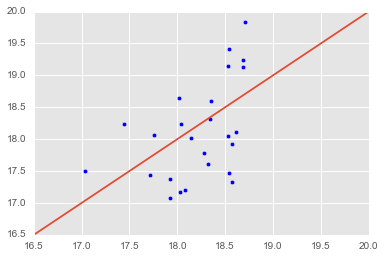

In [339]:
figsize = (20,20)
plt.xlim(16.5, 20.0)
plt.ylim(16.5, 20.0)
plt.scatter(X, Y)

x = np.linspace(16.5, 20, 1000)
plt.plot(x,x)

I have plotted the actual vs. the predicted in a scatter plot. I then plotted a line that is y = x which we would hit if our predicted values lined up with our actual values. We can see that there is a lot of error between the straight line and the scatter plot which implies that we are not very close to having a good predictive model yet.